# Package u need to install 📦

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MultiLabelBinarizer
from transformers import BertTokenizer
from gensim.models import Word2Vec
import gensim.downloader as api

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\backe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [66]:
kalimat = [
    "I love Indonesia.",
    "Sate is scrumptious.",
    "Sei Caduto in un Errore Logico.",
    "Sugeng rawuh! sedulur sak kabehe.",
    "Punten aa, kumaha ieu teh?"
]

# Tokenization⛓️‍💥
**How to mecah texts to unit terkecilnya bisa kata, subkata or character.**

## Tradisional Approach

Pendekatan pertama yg bisa dipake itu adalah as simple kita pecah2 dia berdasarkan spasi, tapi ingat ga smua kalimat yg kita pisah utk jadi kata in general bisa kita pisah spt itu

In [67]:
for kata in kalimat:
    kata_kata = kata.split()
    print(f'Kalimat: {kata}')
    print(f'Kata: {kata_kata}')

Kalimat: I love Indonesia.
Kata: ['I', 'love', 'Indonesia.']
Kalimat: Sate is scrumptious.
Kata: ['Sate', 'is', 'scrumptious.']
Kalimat: Sei Caduto in un Errore Logico.
Kata: ['Sei', 'Caduto', 'in', 'un', 'Errore', 'Logico.']
Kalimat: Sugeng rawuh! sedulur sak kabehe.
Kata: ['Sugeng', 'rawuh!', 'sedulur', 'sak', 'kabehe.']
Kalimat: Punten aa, kumaha ieu teh?
Kata: ['Punten', 'aa,', 'kumaha', 'ieu', 'teh?']


Nah kek gitu kalo dia pakenya split, simple sebenernya disini konsep dia itu adlah misahinnya based delimiternya(default->spasi). Tapi bisa kita liat disini minesnya dia bner2 gabisa handle tanda baca dg bagus, liat si titik selalu ngikut di kata terakhir and etc. Makanya ada teknik yg lebih bagus yaitu pake Word Tokenizer

In [68]:
for kata in kalimat:
    kata_kata = word_tokenize(kata)
    print(f'Kalimat: {kata}')
    print(f'Kata: {kata_kata}')

Kalimat: I love Indonesia.
Kata: ['I', 'love', 'Indonesia', '.']
Kalimat: Sate is scrumptious.
Kata: ['Sate', 'is', 'scrumptious', '.']
Kalimat: Sei Caduto in un Errore Logico.
Kata: ['Sei', 'Caduto', 'in', 'un', 'Errore', 'Logico', '.']
Kalimat: Sugeng rawuh! sedulur sak kabehe.
Kata: ['Sugeng', 'rawuh', '!', 'sedulur', 'sak', 'kabehe', '.']
Kalimat: Punten aa, kumaha ieu teh?
Kata: ['Punten', 'aa', ',', 'kumaha', 'ieu', 'teh', '?']


Keliatan kan disini bedanya, si word tokenizer itu udah misah juga sekalian sama tanda bacanya. Tapi disini problem karena secara semantik suatu kata itu ga hanya dipisah dengan "suatu tanda baca" atau unit dasarnya. Misal nih kek apple's itu nanti dia jadinya apple,',s

Satu lagi haha, si word tokenizer ini juga "hancur" ketika kita punya bahasa baru/gaul gt2lah. Misal -> `Lu kerja dimans sii? kok keliatanya gabut btz.` Nah di kamus word tokenizer itu kata2 spt dimans, gabut, btz gaada jadi dia bisa anggap sbg OOV dan nanti dia jadiin itu UNK token.

## BPE in Action 

Nah model modern sekarang itu mostly pakenya Byte Pair Encoding, jadi basisnya itu udah subword ngetokenizenya. Misal Mahasiswa -> 'Maha', '##siswa'

In [69]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [70]:
encoded = tokenizer(kalimat, padding=True, 
                    truncation=True, return_tensors="pt")

for i, teks in enumerate(kalimat):
    # ambil input ids utk kalimat ke-i
    input_ids_kalimat = encoded['input_ids'][i].tolist()
    # convert id token jadi string token lagi
    token_kalimat = tokenizer.convert_ids_to_tokens(input_ids_kalimat)
    print(f'Kalimat:{teks}')
    print(f'Kata: {token_kalimat}')

Kalimat:I love Indonesia.
Kata: ['[CLS]', 'i', 'love', 'indonesia', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Kalimat:Sate is scrumptious.
Kata: ['[CLS]', 'sat', '##e', 'is', 'sc', '##rum', '##pt', '##ious', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Kalimat:Sei Caduto in un Errore Logico.
Kata: ['[CLS]', 'se', '##i', 'cad', '##uto', 'in', 'un', 'error', '##e', 'logic', '##o', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Kalimat:Sugeng rawuh! sedulur sak kabehe.
Kata: ['[CLS]', 'su', '##gen', '##g', 'raw', '##uh', '!', 'se', '##du', '##lu', '##r', 'sa', '##k', 'ka', '##be', '##he', '.', '[SEP]']
Kalimat:Punten aa, kumaha ieu teh?
Kata: ['[CLS]', 'punt', '##en', 'aa', ',', 'ku', '##mah', '##a', 'ie', '##u', 'te', '##h', '?', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']


Oke, mantap yaa disini keliatan kalo dia treatmentnya itu dipecah2 subwordnya. Sedikit info utk token
- [CLS] -> sbg representasi klo ini tu kalimat
- [PAD] -> sbg 'pengisi' biar urutan yg pendek itu punya pjg yg sama dg urutan terpanjang dlm suatu batch
- [SEP] -> sbg penanda atau akhir dri suatu separator

# Embedding 🧮
**Gimana token direpresent kedalam suatu vektor berdimensi tetap**

pertama jelas kita semua udah kenal sama yg nmanya OHE ini approach basic banget dimana dia nunjukin "is there exist or not?" tapi ingat dia ga nunjukin suatu relasi satu dengan yg lain.

In [71]:
sentence = "Aku sungguh sangat mencintai bakso sapi yang dimasak oleh ibuku"
# tokenizednya cukup kita split kali ini
word_tokenized = [sentence.lower().split()]
word_tokenized

[['aku',
  'sungguh',
  'sangat',
  'mencintai',
  'bakso',
  'sapi',
  'yang',
  'dimasak',
  'oleh',
  'ibuku']]

In [72]:
mlb = MultiLabelBinarizer()
one_hot = mlb.fit_transform(word_tokenized)
print("\n🟥 One-Hot Vocabulary:", mlb.classes_)
print("One-hot for 'bakso':", one_hot[0][mlb.classes_.tolist().index('bakso')],"<-dia ini bakal satu teruss untuk smuanya, krn ya tadi cuma nunjukin exist or not")


🟥 One-Hot Vocabulary: ['aku' 'bakso' 'dimasak' 'ibuku' 'mencintai' 'oleh' 'sangat' 'sapi'
 'sungguh' 'yang']
One-hot for 'bakso': 1 <-dia ini bakal satu teruss untuk smuanya, krn ya tadi cuma nunjukin exist or not


Terus yg lebi baru ada yg namanya->`Word2Vec (CBOW/skip-gram)`, dia belajar dari window lokalnya gitu kek ngepredict based in contextnya.
<br>Misal: ada apa ... kamu, kelihatanya sedih? -> nah kita bakal predict kata itu dari sekitarnya (ini CBOW)

In [73]:
w2v_model = Word2Vec(sentences=word_tokenized, vector_size=10, window=2, min_count=1, workers=1)
print("\n🟦 Word2Vec vector for 'bakso':\n", w2v_model.wv['bakso'])


🟦 Word2Vec vector for 'bakso':
 [-0.08157917  0.04495798 -0.04137076  0.00824536  0.08498619 -0.04462177
  0.045175   -0.0678696  -0.03548489  0.09398508]


BTW, kalo disini ada yg nanya itu angka paan siii? nah itu representasi vektornya si bro, trus kenapa ada 10? ya iya soalnya kita set vector sizenya 10, jadi misal di dimensi 0: -0.081 (artinya "bakso" punya kontribusi negatif di dimensi ini)

In [74]:
print('Vektor Bakso:')
for idx,val in enumerate(w2v_model.wv['bakso']):
    print(f'{idx}↪️{val:.2f}')

Vektor Bakso:
0↪️-0.08
1↪️0.04
2↪️-0.04
3↪️0.01
4↪️0.08
5↪️-0.04
6↪️0.05
7↪️-0.07
8↪️-0.04
9↪️0.09


In [75]:
print('Vektor Sapi:')
for idx,val in enumerate(w2v_model.wv['sapi']):
    print(f'{idx}↪️{val:.2f}')

Vektor Sapi:
0↪️-0.10
1↪️0.05
2↪️-0.09
3↪️-0.04
4↪️-0.00
5↪️-0.00
6↪️-0.08
7↪️0.10
8↪️0.05
9↪️0.09


In [76]:
print('Vektor Ibuku:')
for idx,val in enumerate(w2v_model.wv['ibuku']):
    print(f'{idx}↪️{val:.2f}')

Vektor Ibuku:
0↪️-0.01
1↪️0.00
2↪️0.05
3↪️0.09
4↪️-0.09
5↪️-0.07
6↪️0.06
7↪️0.09
8↪️-0.05
9↪️-0.04


sebenernya secara "kasarnya" kita udah bisa liat kalo emang si bakso itu lebih deket dengan sapi, tapi kita akan validasi once again pke cosine similarity (lebih ilmiah jg wkwk)

In [77]:
# Ambil vektor dari model
v_ibuku = w2v_model.wv['ibuku']
v_sapi = w2v_model.wv['sapi']
v_bakso = w2v_model.wv['bakso']

# Bentuk ke array 2D biar bisa diproses sklearn
vectors = np.array([v_ibuku, v_sapi, v_bakso])
labels = ['ibuku', 'sapi', 'bakso']

# Hitung cosine similarity antar semua pasangan
sim_matrix = cosine_similarity(vectors)

In [78]:
sim_matrix

array([[ 1.        , -0.22418655, -0.27260208],
       [-0.22418655,  1.0000001 ,  0.24953827],
       [-0.27260208,  0.24953827,  1.0000002 ]], dtype=float32)

In [79]:
# bandingin dia masing2
print("\n🔥 Cosine Similarity Matrix")
for i in range(len(labels)):
    for j in range(len(labels)):
            if i!=j:
                print(f"{labels[i]} ↔️ {labels[j]} = {sim_matrix[i][j]:.2f}")


🔥 Cosine Similarity Matrix
ibuku ↔️ sapi = -0.22
ibuku ↔️ bakso = -0.27
sapi ↔️ ibuku = -0.22
sapi ↔️ bakso = 0.25
bakso ↔️ ibuku = -0.27
bakso ↔️ sapi = 0.25


terlihat bahwa memang bakso dan sapi punya cosine sim yg tinggi.

### Sedikit pembuktian dengan visualisasi
nanti akan terlihat kalau bakso bener2 lebih dekat dengan sapi

In [80]:
word_vectors = {
    "bakso": w2v_model.wv['bakso'],
    "sapi": w2v_model.wv['sapi'], 
    "dimasak": w2v_model.wv['dimasak'], 
    "ibuku": w2v_model.wv['ibuku']  
}

words = list(word_vectors.keys())
vectors = np.array([word_vectors[w] for w in words])

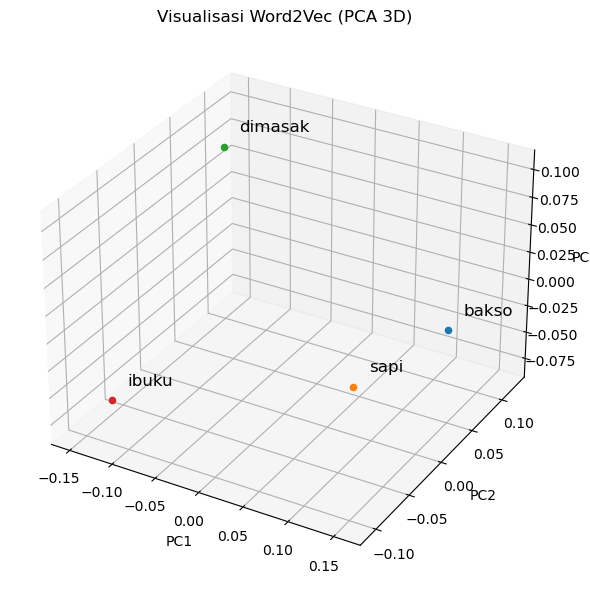

In [81]:
# PCA 3 dimensi
pca_3d = PCA(n_components=3)
reduced_3d = pca_3d.fit_transform(vectors)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for i, word in enumerate(words):
    x, y, z = reduced_3d[i]
    ax.scatter(x, y, z)
    ax.text(x + 0.01, y + 0.01, z + 0.01, word, fontsize=12)

ax.set_title("Visualisasi Word2Vec (PCA 3D)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.tight_layout()
plt.show()

Terus ada Glove, sebenernya disini utk main conceptnya hampir sama pendekatannya, hanya saja dia basis matrixnya co-occurence dan tentunya pretrained.
<br> Buat yg penasaran apa sih co-occurence 🤔
<br> jadi simplenya **co-occurence itu kek sberapa sering 2 kata itu muncul dalam satu konteks (which is klo disini windownya)**, misal nih kita kan sering banget ya nemuin kata "bakso" dan "kuah" terus "soto" dan "kuah". Nah nanti si glove bs ngasi tw bahwa vektor soto dan bakso itu deketan.

In [82]:
# import gensim.downloader as api
glove= api.load("glove-wiki-gigaword-100")

try:
    print("\n🟨 GloVe vector for 'bakso':\n", glove['bakso'])
except:
    print("\n🟨 'bakso' not found in GloVe vocab (check casing/punctuation)")


🟨 GloVe vector for 'bakso':
 [ 0.033904   0.47768   -0.35009   -0.03551    0.40425   -0.13836
  0.40631   -0.34635    0.30708   -0.20823   -0.22807    0.010479
  0.01501    0.23469   -0.21317    0.33624   -0.07122    0.29014
  0.39669    0.31358    0.10733    0.19041   -0.42277   -0.12968
 -0.28085    0.37466   -0.20913    0.41805   -0.02033    0.26688
  0.035072  -0.026574   0.0015617 -0.45732    0.4532     0.22955
  0.16361   -0.33732   -0.0030354 -0.4692     0.039717   0.31478
  0.20568   -0.017727   0.33816   -0.31504    0.024866   0.26932
 -0.0027975  0.7625    -0.20579    0.09217   -0.24812   -0.45499
 -0.14886    0.72996   -0.12679    0.015581  -0.78166   -0.099686
  0.57149   -0.4424    -0.45965    0.27243   -0.30197    0.14087
 -0.10295   -0.43336   -0.16778   -0.12508   -0.2493     0.29616
  0.35317    0.66554   -0.0046357  0.030268  -0.32464    0.077964
  0.47472   -0.17878    0.021797  -0.48949    0.28678    0.020525
  0.39643   -0.025419  -0.31486   -0.044168   0.19627   

In [85]:
try:
    print("\n🟨 GloVe vector for 'meatball':\n", glove['meatball'])
except:
    print("\n🟨 'meatball' not found in GloVe vocab (check casing/punctuation)")


🟨 GloVe vector for 'meatball':
 [-4.1594e-01  9.2149e-01  5.4238e-01 -1.4723e-01 -5.0328e-01  3.3270e-01
  7.8862e-01 -5.7746e-01 -3.1573e-02  4.5393e-01 -5.6421e-01  1.6141e-03
  1.7429e-01  4.7718e-01 -1.7618e-02  4.3529e-01 -1.9299e-01 -6.9631e-01
  2.9631e-02  1.0293e-02 -2.0216e-01  3.2282e-01 -4.0654e-01 -1.4297e-01
  1.6441e-01  9.7935e-01  2.2433e-01  8.1413e-01 -3.9734e-02 -2.6183e-01
  1.6127e-01  1.5824e-01  3.4982e-01 -1.0204e-01  1.9916e-01  1.2213e-01
 -2.3828e-01 -3.9749e-01  2.4149e-01 -5.2528e-01  2.3457e-01  3.7451e-01
 -6.1318e-02 -4.9784e-01 -1.0605e-01  3.5300e-02 -8.8680e-01 -2.2347e-01
 -2.9483e-01  1.9256e-01 -5.8267e-01  4.3597e-02 -3.4669e-01 -3.7876e-01
 -8.3952e-01  3.7466e-01 -1.4246e-01  8.4016e-02 -2.0297e-01  3.9414e-01
 -1.9083e-01  2.3273e-01 -3.4452e-02  8.2528e-01 -2.5023e-01 -5.6444e-02
 -4.7090e-01 -2.3873e-01 -3.7295e-01  7.8183e-03 -3.3597e-01 -2.1384e-01
  2.9271e-01  2.8098e-01  1.4201e-01  3.6465e-01 -4.5627e-01  3.0765e-02
  1.5580e-01  2.02

In [59]:
try:
    print("\n🟨 GloVe vector for 'sapi':\n", glove['sapi'])
except:
    print("\n🟨 'sapi' not found in GloVe vocab (check casing/punctuation)")


🟨 GloVe vector for 'sapi':
 [-0.090403   0.11407   -0.021357   0.2734     0.21941   -0.3912
 -0.41366    0.13317    0.40228   -0.82692   -0.11431   -0.087375
 -0.75536    0.015493   0.74931    0.28701    0.1784     0.091627
  0.30042    0.048118   0.19482   -0.79823    0.091771   0.23247
 -0.1491     0.32454    0.14852    0.34033   -0.22677    0.31044
  0.81392   -0.012929   0.18009   -0.02811    0.23227    0.0047932
 -0.07427   -0.10136    0.74419    0.015942  -0.5788    -0.48526
  0.31832    0.20384   -0.040021  -0.53469   -0.2496     0.073077
  0.31809    0.44468   -0.36439    0.16193    0.041966  -0.2763
  0.32295    0.73637   -0.22975   -0.5447    -0.1591    -0.51163
 -0.10965    0.12902   -0.23842    0.015497  -0.67473   -0.57197
 -0.36842   -0.034412  -0.098011  -0.1846     0.11332    0.57416
  0.98621    0.023568  -0.20612    0.4038    -0.34364    0.27842
  0.60846    0.30078   -0.86175   -0.87983    0.41006    0.2109
  0.47485    0.55151    0.19373    0.15897    0.57628    0.

Nah si Glove ini beda approachnya dengan Word2Vec dimana, Glove itu ngeliat konteks secara general kalo Word2Vec itu bener2 nuancenya didapat dari data lokal kita. Tapi tradeoffnya adalah kek contoh diatas, keliatan banget kan?
- si bakso dan sapi ga deket dari angkanya? jawaban singkat dan lucunya iyaa, karena glove wiki itu dilatih ke bahasa inggris hahaha
- kita balik lg ke konsep "co-occurences" tadi, dia kan cuma ngeliat distribusinya purely stats banget kan? dimana dua kata itu muncul dlm suatu konteks
<br>Sekarang kita coba aja klo ke bahasa inggris yaa... 👇

In [88]:
try:
    print("\n🟨 GloVe vector for 'sauce':\n", glove['sauce'])
except:
    print("\n🟨 'sauce' not found in GloVe vocab (check casing/punctuation)")


🟨 GloVe vector for 'sauce':
 [-1.2736e+00  6.2730e-01  1.7726e-03 -3.5656e-01 -2.6832e-01  4.9250e-01
  1.2867e+00 -4.0008e-02  5.1850e-01 -7.4054e-02  6.5537e-02 -3.6066e-02
 -1.3357e-01  6.0609e-01 -5.2490e-01 -4.8632e-02  3.5947e-01 -1.0301e+00
  3.7887e-01 -7.2638e-02 -2.9857e-01  2.9651e-01  7.9060e-03 -6.2650e-01
 -4.0341e-01  1.8887e+00  4.4841e-02 -2.5939e-01 -2.7910e-01 -9.7310e-01
 -2.8309e-01  8.5994e-01 -4.2343e-01 -7.0646e-01  1.5511e-01  1.3182e+00
  6.1485e-01 -1.4792e-01  8.1772e-01 -8.1013e-01  7.8446e-01 -1.8056e+00
 -5.6805e-01 -1.3261e+00  9.9687e-01  3.3294e-01 -5.7511e-01 -6.0964e-01
  5.1495e-01 -1.2282e+00 -3.8166e-01  1.6704e-01 -7.2159e-01  1.0191e+00
 -1.6597e+00 -6.4787e-01 -1.3609e-01 -2.2263e-01 -1.5168e-02  2.4426e-01
 -3.2894e-01  8.5942e-01  9.2141e-01  3.5343e-01  4.1491e-01 -1.0394e+00
  1.2184e-01 -1.9172e-01 -1.4375e-01 -9.5844e-03 -7.4170e-02  5.4519e-01
  5.8833e-01  7.2610e-01  3.7509e-01  1.3124e+00 -1.1103e+00 -7.2948e-01
  9.0945e-01  7.5513e

In [89]:
try:
    print("\n🟨 GloVe vector for 'spaghetti':\n", glove['spaghetti'])
except:
    print("\n🟨 'spaghetti' not found in GloVe vocab (check casing/punctuation)")


🟨 GloVe vector for 'spaghetti':
 [-0.88895    0.4844    -0.051903  -0.70839   -0.31769    0.13902
  0.411      0.46638    0.19855    0.71711    0.15309   -0.213
 -0.1862     1.2099     0.57984    0.22034    0.56773   -0.61531
  0.57544    0.38726   -0.15263    0.22617    0.4436    -0.83482
  0.55988    1.1118    -0.11076   -0.38565   -0.096068  -0.72056
  0.10133   -0.137     -0.035427  -0.58399    0.46611    1.196
  0.89378   -0.13785    0.72573   -0.46004   -0.10664   -0.0015739
 -0.24956   -0.70021    0.63092   -0.018898   0.26197   -0.43055
 -0.22856    0.21683   -0.63615    0.32427    0.52857    0.31404
 -1.283     -0.35121   -0.42281    0.87171    0.20718    0.559
 -0.37616    0.92871    0.27252   -0.18739   -0.42607   -0.92642
 -0.3723    -0.15407   -0.37191    0.62548   -0.031421   0.34789
  0.73675    0.34429   -0.42037    0.6584    -0.87335    0.23203
  0.97209    1.4313     0.10229    0.082783   0.22729    0.52184
 -0.58517    0.3238    -1.0612     0.49181   -0.73176    0.2

In [90]:
try:
    print("\n🟨 GloVe vector for 'soccer':\n", glove['soccer'])
except:
    print("\n🟨 'soccer' not found in GloVe vocab (check casing/punctuation)")


🟨 GloVe vector for 'soccer':
 [ 8.3777e-01  5.1890e-01  6.4015e-01 -6.2606e-01 -9.7474e-01  1.0127e+00
  6.2729e-02  4.4316e-01 -8.3299e-01  7.9888e-02 -1.1815e-02 -1.1265e+00
  1.2554e-01 -3.4206e-01 -5.1422e-01  3.8526e-01  1.0032e+00 -1.5172e-03
 -2.2684e-01  3.5658e-01 -6.2449e-01  8.7271e-01  3.6670e-01  4.6462e-01
 -1.0046e-01 -4.4798e-01 -2.1813e-01 -5.6423e-01  5.6665e-01  5.1601e-01
 -5.6511e-01  7.1919e-01 -6.5347e-01 -9.5952e-02  5.6028e-01 -4.9956e-01
 -7.4757e-01  6.8516e-01 -1.4518e+00 -1.1207e-01  1.0241e-01  3.0537e-02
  1.1326e-02 -8.6873e-01  6.3622e-01  4.9539e-01  3.0538e-01  7.7133e-02
  7.4048e-02 -7.1163e-01 -1.9159e-01 -3.4168e-01 -4.7185e-01  5.6794e-01
  3.7454e-01 -1.9207e+00 -8.6040e-01  5.7058e-01  1.0700e+00  9.2101e-01
 -6.4825e-01  5.3516e-01 -1.5556e-01 -9.0021e-01 -1.7459e-01  3.3146e-02
 -5.7512e-01  2.9963e-01 -4.0008e-01 -1.0765e-01  4.1384e-01 -7.2178e-01
  1.1442e-01 -2.1291e-01  5.4949e-02  1.3213e-01  7.8766e-01  8.9291e-02
 -6.6689e-01  3.3998

In [91]:
spaghetti_vec = glove['spaghetti']
sauce_vec = glove['sauce']

sim = cosine_similarity([spaghetti_vec], [sauce_vec])[0][0]
print(f"Similarity: {sim:.2f}")

Similarity: 0.59


In [92]:
spaghetti_vec = glove['spaghetti']
soccer_vec = glove['soccer']

sim = cosine_similarity([spaghetti_vec], [soccer_vec])[0][0]
print(f"Similarity: {sim:.2f}")

Similarity: 0.07


Keliatan kan sekarang? spaghetti sama sauce lebih deket dibanding kalo konteksnya sama vektor sepakbola. Udah clear kan temen-temen smua utk NLP 101 Episode_1. Monggo dilanjut ke Episode_2 yaa kita akan bahas lebih lanjut konsep-konsep lainnya yang ga kalah seru. Happy Learning 🙌